# Logistic Regression as a Single Neuran of a Neural Network

Welcome to your first programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset where logistic regression represents a single nueron. 

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 -  Loading Packages ##
First, let's run the cell below to import all the packages that you will need during this assignment. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import glob
from sklearn.model_selection import train_test_split

%matplotlib inline

## 2 - Utility functions to convert images into datasets ##
The following functions are used to convert the cats and dogs images in the dataset folder into the numpy array format with labels. 

In [2]:
# Since the Car dataset is in the form of .hdf5 file and not images, we do not need these utility
# functions that converts images into datasets


'''def convert_image_to_data(image, WIDTH, HEIGHT):
    image_resized = Image.open(image).resize((WIDTH, HEIGHT))
    image_array = np.array(image_resized).T
    return image_array
'''

'def convert_image_to_data(image, WIDTH, HEIGHT):\n    image_resized = Image.open(image).resize((WIDTH, HEIGHT))\n    image_array = np.array(image_resized).T\n    return image_array\n'

In [3]:
'''def create_train_test_data(num_pix,test_size=0.2):
    cat_files = glob.glob("datasets/cat*")
    dog_files = glob.glob("datasets/dog*")

    # Restrict cat and dog files here for testing
    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]
    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]

    y_cat = np.zeros(len(cat_list))
    y_dog = np.ones(len(dog_list))

    X = np.concatenate([cat_list, dog_list])
    X = np.concatenate([cat_list, dog_list])
    y = np.concatenate([y_cat, y_dog])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    return X_train, X_test, y_train, y_test'''

'def create_train_test_data(num_pix,test_size=0.2):\n    cat_files = glob.glob("datasets/cat*")\n    dog_files = glob.glob("datasets/dog*")\n\n    # Restrict cat and dog files here for testing\n    cat_list = [convert_image_to_data(i, num_pix, num_pix) for i in cat_files]\n    dog_list = [convert_image_to_data(i, num_pix, num_pix) for i in dog_files]\n\n    y_cat = np.zeros(len(cat_list))\n    y_dog = np.ones(len(dog_list))\n\n    X = np.concatenate([cat_list, dog_list])\n    X = np.concatenate([cat_list, dog_list])\n    y = np.concatenate([y_cat, y_dog])\n\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)\n    return X_train, X_test, y_train, y_test'

### 2.1 - Load data set ###
Use the utility functions provided above to load the train_set_x,train_set_y, test_set_x, test_set_y.
Set the `num_pix` to 64 and keep the `test_size` as the default value.

In [4]:
# set the num_pix to 64
num_pix = 64

def load_dataset(database_path):
    # open dataset 
    database = h5py.File(database_path, "r")
    
    
    datasets = {}
    for i in ["train", "dev", "test"]:
        
        # load the train set feautres (picuture)
        datasets[i] = {'X' : np.array(database[i + "_img"][:]),  # dataset features
                              'Y' : np.array(database[i + "_labels"][:]) # dataset labels
                            }
    return datasets
    

datasets = load_dataset('car_dataset.hdf5')

train_set_x_orig = datasets['train']['X']
train_set_y = datasets['train']['Y']
test_set_x_orig = datasets['dev']['X']
test_set_y = datasets['dev']['Y']
#test_set_x_orig = datasets['test']['X']
#test_set_y = datasets['test']['Y']

# The dev set is used for validation of the trained model. This data has been extracted from the training dataset which
# helps in evaluating the performance of the trained model.

# To check the accuracy with respect to the test data, comment the 'test_set_x_orig' and 'test_set_y' variables with 'dev' as
# input value and uncomment the ones with 'test' as input value.

#### 2.1.1 - Print the shapes ###
Print the shape of the following variables
- Number of training examples: m_train
- Number of testing examples: m_test
- Height/Width of each image: num_px
- train_set_x shape
- train_set_y shape
- test_set_x shape
- test_set_y shape

In [5]:
# your code here
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 517
Number of testing examples: m_test = 172
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (517, 64, 64, 3)
train_set_y shape: (517,)
test_set_x shape: (172, 64, 64, 3)
test_set_y shape: (172,)


#### 2.1.2 - Fixing ill-shape vectors ####
It is possible that the train_set_y and test_set_y have an ill-shape. Fix these shapes so the train_set_y and test_set_y are represented as a matrix with size (1, number of examples)

In [6]:
# your code here <begin>

train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))

# your code here <end>

print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_y shape: (1, 517)
test_set_y shape: (1, 172)


### 2.2 - Flatten the data
Reshape the training and test data sets so that each image is flattened into single vectors of shape (num_px  ∗ num_px  ∗ 3, 1). Check the shapes for train_set_x_flatten and test_set_x_flatten.

In [7]:
# your code here
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))

train_set_x_flatten shape: (12288, 517)
test_set_x_flatten shape: (12288, 172)


### 2.3 - Standardize the data
Divide every row of the dataset by 255 

In [8]:
# your code here
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

## 3 - Implementing the Helper Functions ## 

### 3.1 - Sigmoid function
Implement `sigmoid()`. 

In [9]:
# your code here
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, 2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


### 3.2 - Implement initialize_with_zeros
Write a function that initializes initialize w as a vector of zeros and set `b` to zero. 

In [10]:
# your code here
def initialize_with_zeros(dim):
    
    w = np.zeros(shape = (dim, 1))
    b = 0.0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

dim = 2
w, b = initialize_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


### 3.3 - Forward propagation

Implement forward propagation to calculate $A$ and cost.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$


In [11]:
# your code here
def forward_propagation(w, b, X, Y):
    
    m = X.shape[1]
    
    Z = np.dot(w.T, X) + b
    A =sigmoid(Z)
    
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

### 3.4 - Backward propagation

Implement backward propagation to compute gradients $dw$ and $db$
Here are the two formulas you will be using: 

$$ dw = \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ db = \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [12]:
# your code here
def backward_propagation(w, b, X, Y):
    
    m = X.shape[1]
    
    Z = np.dot(w.T, X) + b
    A =sigmoid(Z)
    
    dz = A - Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    grads = {"dw": dw,
             "db": db}
   
    return grads

w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1, 2],[3, 4]]), np.array([[1,0]])
grads = backward_propagation(w, b, X, Y)
cost = forward_propagation(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


### 3.5 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. 

In [13]:
# your code here
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = True):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads = backward_propagation(w, b, X, Y)
        cost = forward_propagation(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 6.000065
w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


### 3.6 - Prediction

Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [14]:
# your code here
def predict(w, b, X):
    
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    
    Z = np.dot(w.T, X) + b
    A = sigmoid(Z)
    
    Y_prediction = np.around(A)
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


## 4 - Regression Model ##
Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [15]:
# your code here
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = True):
    
    # initialize parameters with zeros (≈ 1 line of code)
    n = X_train.shape[0]
    w, b = initialize_with_zeros(dim = n)

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

## 5. Run the regression model function to train your model.
### 5.1 - Setting parameters (part 1)
Set the `num_iterations` to 5000 and `learning_rate` to 0.0005

In [16]:
# your code here
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.0005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.548509
Cost after iteration 200: 0.496297
Cost after iteration 300: 0.459536
Cost after iteration 400: 0.432244
Cost after iteration 500: 0.411066
Cost after iteration 600: 0.394034
Cost after iteration 700: 0.379940
Cost after iteration 800: 0.368004
Cost after iteration 900: 0.357705
Cost after iteration 1000: 0.348679
Cost after iteration 1100: 0.340667
Cost after iteration 1200: 0.333477
Cost after iteration 1300: 0.326965
Cost after iteration 1400: 0.321019
Cost after iteration 1500: 0.315553
Cost after iteration 1600: 0.310498
Cost after iteration 1700: 0.305796
Cost after iteration 1800: 0.301404
Cost after iteration 1900: 0.297283
Cost after iteration 2000: 0.293401
Cost after iteration 2100: 0.289732
Cost after iteration 2200: 0.286254
Cost after iteration 2300: 0.282948
Cost after iteration 2400: 0.279796
Cost after iteration 2500: 0.276785
Cost after iteration 2600: 0.273902
Cost after iteration 2700: 0.271136
Cost

**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 91.25 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 60.0 % </td>
    </tr>
</table> 




Let's also plot the cost function and the gradients.

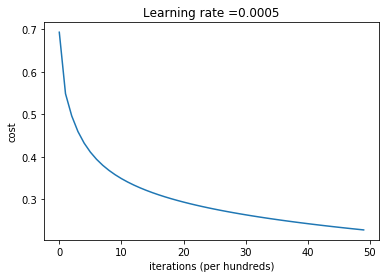

In [17]:
# Plot learning curve (with costs) for part 1
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 5.1 - Setting parameters (part 2)
Set the `num_iterations` to 2000 and `learning_rate` to 0.005 and run the model again. Plot the cost function.

In [18]:
# your code here
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.348325
Cost after iteration 200: 0.293235
Cost after iteration 300: 0.263346
Cost after iteration 400: 0.242531
Cost after iteration 500: 0.226353
Cost after iteration 600: 0.213014
Cost after iteration 700: 0.201614
Cost after iteration 800: 0.191640
Cost after iteration 900: 0.182771
Cost after iteration 1000: 0.174791
Cost after iteration 1100: 0.167547
Cost after iteration 1200: 0.160925
Cost after iteration 1300: 0.154839
Cost after iteration 1400: 0.149219
Cost after iteration 1500: 0.144009
Cost after iteration 1600: 0.139162
Cost after iteration 1700: 0.134640
Cost after iteration 1800: 0.130409
Cost after iteration 1900: 0.126441
train accuracy: 97.48549323017409 %
test accuracy: 91.86046511627907 %


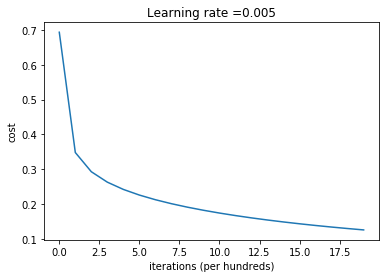

In [19]:
# Plot learning curve (with costs) for part 2
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

### 5.3 - Analysis
Compare the cost function plots of part_1 and part_2. Write your observation below.

## Analysis



### Case 1: Number of Iterations- 5000, Learning Rate- 0.0005

The graph of cost vs. number of iterations gradually curves down since the number of iterations are too high with the learning rate being quite low. The cost diverges with the increase in iterations. There are no sharp corners observed in the graph which indicates the learning rate is smooth.

The training accuracy obtained is 92.06 % and the test accuracy obtained is 92.44 %. Here, the accuracy of testing is more than that of training which indicates the data is overfitting.

### Case 2: Number of Iterations- 2000, Learning Rate- 0.005

The graph of cost vs. number of iterations gradually curves down faster initially and gradually starts to straighten up as the number of iterations are and the learning rate are not at the extremity as in the above case. The cost plunges with the increase in iterations. There are a few sharp corners observed in the graph which indicates the learning rate is not as smooth as in the above case.

The training accuracy obtained is 97.48 % and the test accuracy obtained is 91.86 %.

### General Observation

Usually, a lower cost doesn't necessarily mean a better model. There are bright chances of overfitting the model when the training accuracy is very high compared to the test accuracy.

The dev set is used from the load_dataset() function for validation of the trained model. This data has been extracted from the training dataset which helps in evaluating the performance of the trained model. The test data can be used to check the accuracy of the classifier and get unbiased results.

#### Not Shown in the Notebook
To check the accuracy with respect to the test data, comment the 'test_set_x_orig' and 'test_set_y' variables with 'dev' as input value and uncomment the ones with 'test' as input value. 

When test data is used, for the first case, the training accuracy obtained is 92.06 %, while the testing accuracy is 87.28 %. And for the second case, the training accuracy obtained is 97.48 %, while the testing accuracy is 89.59 %. 

#### References-
                                                                     
Logistic Regression Labs 1 to 3